## Importing libraries (4GB ram requied)

In [1]:
import pandas as pd
from datetime import datetime
import earthaccess
import xarray as xr

## Load csv

In [2]:
tag = pd.read_csv("Red_rum_updated.csv",
    parse_dates=["week_utc"],
    skiprows=4
)
tag

,tag_id,common_name,week_utc,latitude,longitude,n_days_detected
0,BCNCBO-1572494-2024-06-13,red drum,2024-06-10,38.727936,-76.336701,4.0
1,BCNCBO-1572494-2024-06-13,red drum,2024-06-17,38.727042,-76.338095,6.0
2,BCNCBO-1572494-2024-06-13,red drum,2024-06-24,38.726990,-76.338130,7.0
3,BCNCBO-1572494-2024-06-13,red drum,2024-07-01,38.726993,-76.338128,7.0
4,BCNCBO-1572494-2024-06-13,red drum,2024-07-08,38.726990,-76.338130,6.0
...,...,...,...,...,...,...
121,BCNCBO-1608648-2024-07-30,red drum,2024-11-04,38.307740,-76.377293,3.0
122,BCNCBO-1608648-2024-07-30,red drum,2024-11-11,38.311080,-76.314040,1.0
123,NaN,NaN,NaT,NaN,NaN,NaN
124,NaN,NaN,NaT,NaN,NaN,NaN


## Remove NaN rows

In [3]:
tag = tag[tag["week_utc"].notna()]
tag

,tag_id,common_name,week_utc,latitude,longitude,n_days_detected
0,BCNCBO-1572494-2024-06-13,red drum,2024-06-10,38.727936,-76.336701,4.0
1,BCNCBO-1572494-2024-06-13,red drum,2024-06-17,38.727042,-76.338095,6.0
2,BCNCBO-1572494-2024-06-13,red drum,2024-06-24,38.726990,-76.338130,7.0
3,BCNCBO-1572494-2024-06-13,red drum,2024-07-01,38.726993,-76.338128,7.0
4,BCNCBO-1572494-2024-06-13,red drum,2024-07-08,38.726990,-76.338130,6.0
...,...,...,...,...,...,...
118,BCNCBO-1608648-2024-07-30,red drum,2024-10-14,38.770600,-76.355130,2.0
119,BCNCBO-1608648-2024-07-30,red drum,2024-10-21,38.316936,-76.420400,1.0
120,BCNCBO-1608648-2024-07-30,red drum,2024-10-28,38.316707,-76.420333,4.0
121,BCNCBO-1608648-2024-07-30,red drum,2024-11-04,38.307740,-76.377293,3.0


## Calculate monthly mean positions per fish

In [4]:
red_drum_monthly = tag.groupby(
    [pd.PeriodIndex(tag.week_utc, freq="M"),
     tag.tag_id])[["longitude","latitude"]].mean().reset_index()

red_drum_monthly

,week_utc,tag_id,longitude,latitude
0,2024-06,BCNCBO-1572494-2024-06-13,-76.337642,38.727323
1,2024-07,BCNCBO-1572494-2024-06-13,-76.338125,38.726997
2,2024-07,BCNCBO-1608605-2024-07-28,-76.337766,38.727529
3,2024-07,BCNCBO-1608611-2024-07-29,-76.336226,38.729791
4,2024-07,BCNCBO-1608612-2024-07-29,-76.336399,38.729529
5,2024-07,BCNCBO-1608624-2024-07-31,-76.334751,38.732594
6,2024-07,BCNCBO-1608625-2024-08-01,-76.337125,38.728724
7,2024-07,BCNCBO-1608628-2024-08-01,-76.338083,38.727060
8,2024-07,BCNCBO-1608632-2024-08-02,-76.336377,38.729596
9,2024-07,BCNCBO-1608636-2024-07-29,-76.336477,38.728547


## Define the bounding box and date ranges

In [5]:
lat_range = (tag.latitude.min()-1, tag.latitude.max()+1)
lon_range = (tag.longitude.min()-1, tag.longitude.max()+1)
date_range = (tag.week_utc.min(), tag.week_utc.max())


## Login and search PACE data

In [6]:
import earthaccess
earthaccess.login()

In [7]:
# search by sensor

results = earthaccess.search_datasets(instrument="oci")
for item in results[0:]:
    summary = item.summary()
    print(summary["short-name"])

PACE_OCI_L0_SCI
PACE_OCI_L1A_SCI
PACE_OCI_L1B_SCI
PACE_OCI_L1C_SCI
PACE_OCI_L2_UVAI_UAA_NRT
PACE_OCI_L2_UVAI_UAA
PACE_OCI_L2_AER_UAA_NRT
PACE_OCI_L2_AER_UAA
PACE_OCI_L2_AOP_NRT
PACE_OCI_L2_AOP
PACE_OCI_L2_CLOUD_MASK_NRT
PACE_OCI_L2_CLOUD_MASK
PACE_OCI_L2_CLOUD_NRT
PACE_OCI_L2_CLOUD
PACE_OCI_L2_IOP_NRT
PACE_OCI_L2_IOP
PACE_OCI_L2_LANDVI_NRT
PACE_OCI_L2_LANDVI
PACE_OCI_L2_BGC
PACE_OCI_L2_BGC_NRT
PACE_OCI_L2_PAR_NRT
PACE_OCI_L2_PAR
PACE_OCI_L2_SFREFL_NRT
PACE_OCI_L2_SFREFL
PACE_OCI_L3B_AOT_NRT
PACE_OCI_L3B_AOT
PACE_OCI_L3B_AVW_NRT
PACE_OCI_L3B_AVW
PACE_OCI_L3B_CARBON
PACE_OCI_L3B_CARBON_NRT
PACE_OCI_L3B_CHL_NRT
PACE_OCI_L3B_CHL
PACE_OCI_L3B_KD_NRT
PACE_OCI_L3B_KD
PACE_OCI_L3B_FLH_NRT
PACE_OCI_L3B_FLH
PACE_OCI_L3B_IOP_NRT
PACE_OCI_L3B_IOP
PACE_OCI_L3B_LANDVI_NRT
PACE_OCI_L3B_LANDVI
PACE_OCI_L3B_PIC_NRT
PACE_OCI_L3B_PIC
PACE_OCI_L3B_POC_NRT
PACE_OCI_L3B_POC
PACE_OCI_L3B_PAR_NRT
PACE_OCI_L3B_PAR
PACE_OCI_L3B_RRS_NRT
PACE_OCI_L3B_RRS
PACE_OCI_L3B_SFREFL_NRT
PACE_OCI_L3B_SFREFL
PACE_OCI_L3M_UV

In [8]:
# select the dataset
results = earthaccess.search_data(
    short_name="PACE_OCI_L3M_CHL",
    temporal= date_range,
    granule_name="*.MO.*.4KM.*",
)
len(results)

8

In [9]:
#show results
results[0]

Collection: {'ShortName': 'PACE_OCI_L3M_CHL', 'Version': '3.1'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'NorthBoundingCoordinate': 90, 'SouthBoundingCoordinate': -90, 'EastBoundingCoordinate': 180, 'WestBoundingCoordinate': -180}]}}}
Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-06-30T23:59:59Z', 'BeginningDateTime': '2024-06-01T00:00:00Z'}}
Size(MB): 50.84863090515137
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240601_20240630.L3m.MO.CHL.V3_1.chlor_a.4km.nc']

In [10]:
# urls
[res.data_links() for res in results]

[['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240601_20240630.L3m.MO.CHL.V3_1.chlor_a.4km.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240701_20240731.L3m.MO.CHL.V3_1.chlor_a.4km.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240801_20240831.L3m.MO.CHL.V3_1.chlor_a.4km.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240901_20240930.L3m.MO.CHL.V3_1.chlor_a.4km.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20241001_20241031.L3m.MO.CHL.V3_1.chlor_a.4km.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20241101_20241130.L3m.MO.CHL.V3_1.chlor_a.4km.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20241201_20241231.L3m.MO.CHL.V3_1.chlor_a.4km.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250101_202

## Set up a file pointer


In [11]:
fileset = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

## Load Data with xarray

In [12]:
import xarray as xr
from datetime import datetime
import re

datasets = []

for f in fileset:
    filename = f.info()['name']
    
    # Extract the first 8-digit number (start date)
    match = re.search(r'\d{8}', filename)
    if match:
        start_date_str = match.group()           # e.g., '20240601'
        time = datetime.strptime(start_date_str, "%Y%m%d")
    else:
        raise ValueError(f"No date found in filename: {filename}")
    
    ds = xr.open_dataset(f)
    ds = ds.assign_coords(time=[time])          # add time coordinate
    datasets.append(ds)

# Concatenate all months along time dimension
ds_chl = xr.concat(datasets, dim="time", data_vars='all')

# Optional: check your time coordinates
print(ds_chl.time.values)

['2024-06-01T00:00:00.000000000' '2024-07-01T00:00:00.000000000'
 '2024-08-01T00:00:00.000000000' '2024-09-01T00:00:00.000000000'
 '2024-10-01T00:00:00.000000000' '2024-11-01T00:00:00.000000000'
 '2024-12-01T00:00:00.000000000' '2025-01-01T00:00:00.000000000']


## Subset to Your Region

In [13]:
ds_region = ds_chl.sel(
    lat=slice(lat_range[1], lat_range[0]),
    lon=slice(lon_range[0], lon_range[1])
)

## Plot maps

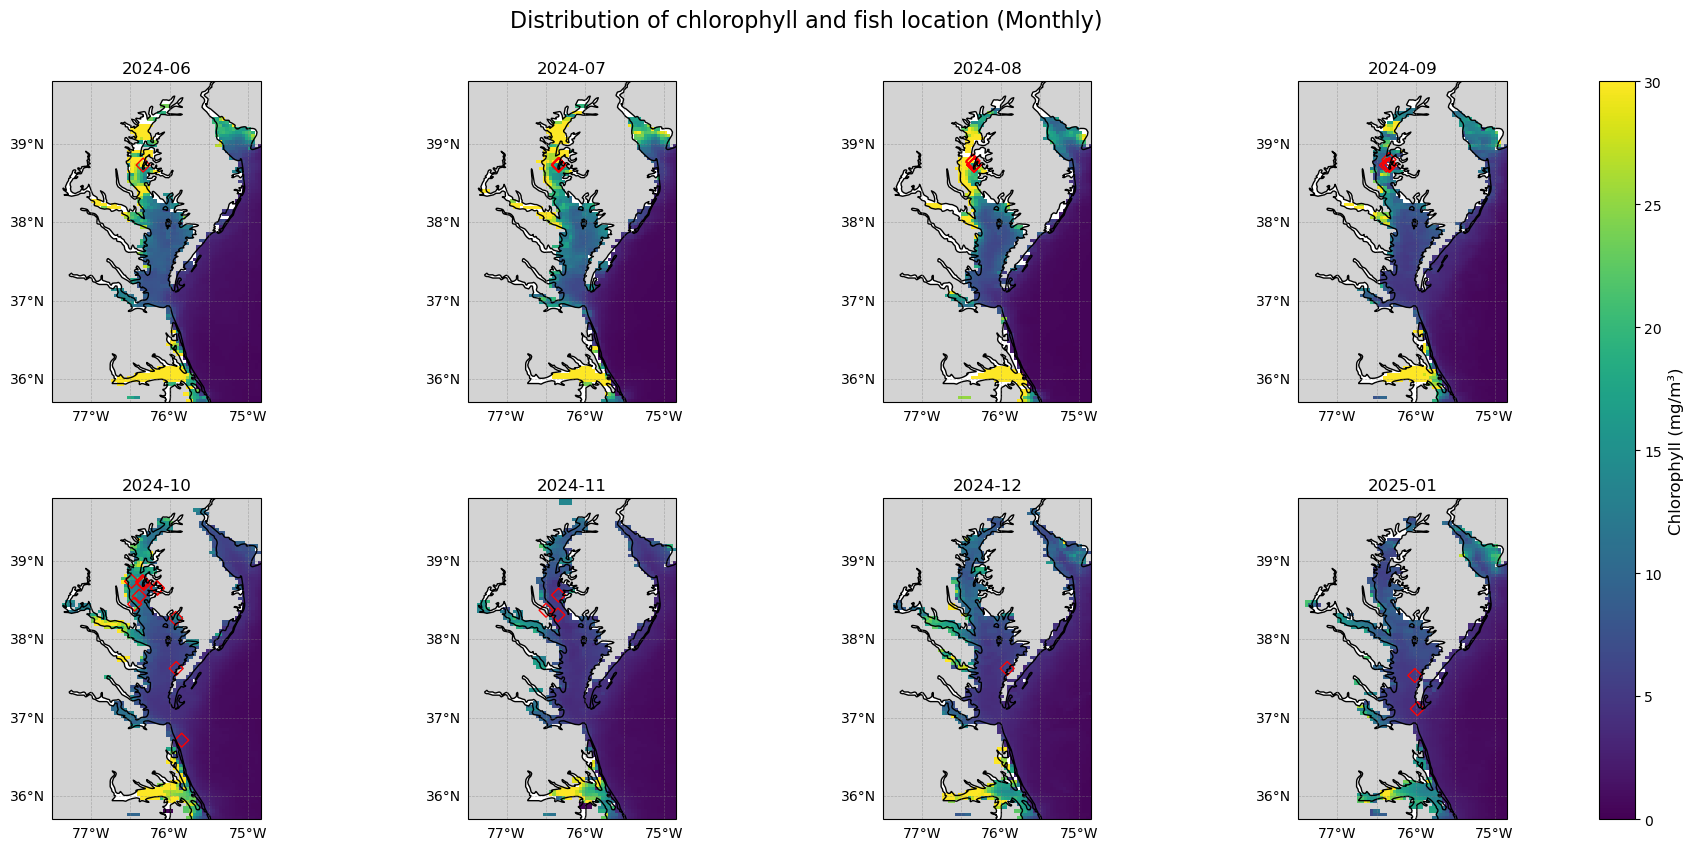

In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime
import numpy as np

months = red_drum_monthly.week_utc.unique()

# Color scale
color_min = 0
color_max = 30

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(18,9),
                        subplot_kw={'projection': ccrs.PlateCarree()})

# Flatten axes array for easy iteration
axs = axs.flatten()

for month, ax in zip(months, axs):
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.COASTLINE)
    
    # Gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}

    ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]])

    # Select monthly chlorophyll
    chl_plot = ds_region.sel(time=datetime.strptime(str(month), "%Y-%m"))["chlor_a"]
    
    # Plot chlorophyll with fixed color scale 0-30
    mesh = ax.pcolormesh(chl_plot.lon, chl_plot.lat, chl_plot,
                         cmap='viridis', shading='auto', vmin=color_min, vmax=color_max)
    
    # Plot fish locations
    fish_points = red_drum_monthly[red_drum_monthly.week_utc==month]
    ax.scatter(fish_points.longitude, fish_points.latitude, color='none', marker='D', edgecolor='red', s=50)
    
    ax.set_title(str(month), fontsize=12)
    
    # Axis labels
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

# Super title
fig.suptitle("Distribution of chlorophyll and fish location (Monthly)", fontsize=16, y=0.98)

# Adjust layout to make space for the colorbar
fig.subplots_adjust(left=0.05, right=0.92, top=0.9, bottom=0.08, wspace=0.3, hspace=0.3)

# Add a single colorbar on the right side
cbar_ax = fig.add_axes([0.94, 0.08, 0.02, 0.82])  # [left, bottom, width, height]
cbar = fig.colorbar(mesh, cax=cbar_ax, orientation='vertical')
cbar.set_label("Chlorophyll (mg/m³)", fontsize=12)

# Save figure
plt.savefig("Distribution_of_chlorophyll_and_fish_location_monthly_30_one_colorbar.png", dpi=300)
plt.show()
